# Linear Least Squares Regression 


## *BOGDAN BOŠKOVIĆ*

Instructions for all assignments can be found [here](https://github.com/kylebradbury/ids705/blob/main/notebooks/assignment_instructions.ipynb), and is also linked to from the course syllabus.


The primary reference for this assignment is chapters 2 and 3 of our textbook [Understanding Deep Learning](https://udlbook.github.io/udlbook/).

Some of the following references may also be helpful for reviewing calculus or linear algebra:
- [Mathematics for Machine Learning](https://mml-book.github.io/book/mml-book.pdf) by Deisenroth, Faisal, and Ong
- [Deep Learning](https://www.deeplearningbook.org/); Part I: Applied Math and Machine Learning Basics by Goodfellow, Bengio, and Courville

*Note: don't worry if you don't understand everything in the references above - some of these books dive into significant minutia of each of these topics.*

## 1 Supervised vs Unsupervised Learning
**[20 points]** For each of the following, (i) explain if each scenario is a classification or regression problem AND why, (ii) indicate whether we are most interested in inference or prediction for that problem AND why, and (iii) provide the sample size $n$ and number of predictors $p$ indicated for each scenario.

**(a)** We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

**(b)** We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

**(c)** We are interesting in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market.

**ANSWER:**

**a.** i. This is a regression problem, and here CEO salary is a continuous variable.

&nbsp;&nbsp;&nbsp;&nbsp;ii. We're most interested in inference here because we want to understand which factors affect CEO salary.

&nbsp;&nbsp;&nbsp;&nbsp;iii. n = 500, p = 3 (profit, number of employees, industry)

**b.** i. This is a classification problem, and here we are interested in whether the product will be a success or a flop.

&nbsp;&nbsp;&nbsp;&nbsp;ii. We're most interested in predicting whether something will flop or not.

&nbsp;&nbsp;&nbsp;&nbsp;iii. n = 20, p = 13 (price charged for the product, marketing budget, competition price, +10 other variables)

**c.** i. This is a regression problem, and here % change in the US dollar is a continuous variable.

&nbsp;&nbsp;&nbsp;&nbsp;ii. We're most interested in prediction here because we want to predict the % change in the US dollar in relation to the weekly changes in the world stock markets.
    
&nbsp;&nbsp;&nbsp;&nbsp;iii. n = 52, p = 3 (% change in the US market, % change in the British market, % change in the German market)

---

## 2 Simple Linear Least Squares Regression
**[40 points] Build your own llinear regression algorithm**.

In this problem you will solve a single-variable linear least squares (LLS) regression problem. Assume that our data was generated by the following model: $Y = wx + E $  where $x \in R$, $w \in R$, and  $E \sim N(0,\sigma^{2})$. Here we assume $\sigma$ is some unknown variance of our noise.

**(a)** Given some collection of observations from this model of the form $d=(x_{i},y_{i})_{i=1}^{N}$, write out the derivation for the linear least squares solution for $w$, given in terms of $x_{i}$ and $y_{i}$, using calculus.  Show your work!  This should involve at least a few lines of math.  Please clearly label the final formula for calculating your weights.     

**ANSWER:**

$$MSE = \frac{1}{N}\sum_{i=1}^{N}(y_{i} - wx_{i})^{2}$$

$$\frac{\partial MSE}{\partial w} = \frac{1}{N}\sum_{i=1}^{N}2(y_{i} - wx_{i})(x_{i})$$

$$\frac{\partial MSE}{\partial w} = \frac{1}{N}\sum_{i=1}^{N}2(y_{i}x_{i} - wx_{i}^{2})$$

$$\frac{\partial MSE}{\partial w} = \frac{2}{N}\sum_{i=1}^{N}(y_{i}x_{i} - wx_{i}^{2}) = 0$$


$$\sum_{i=1}^{N}y_{i}x_{i} - w\sum_{i=1}^{N}x_{i}^{2} = 0$$

$$w\sum_{i=1}^{N}x_{i}^{2} = \sum_{i=1}^{N}y_{i}x_{i}$$

$$w = \frac{\sum_{i=1}^{N}y_{i}x_{i}}{\sum_{i=1}^{N}x_{i}^{2}}$$

---

**(b)** Build a working version of a *single variable* LLS regression model using the skeleton code below. We'll use the `sklearn` convention that a supervised learning algorithm has the methods `fit` which trains your algorithm (for LLS that means estimating the weight parameters) and `predict` which uses the estimated weights to predict y for new settings of x.  For training, use the formula you derived in part (a) to infer the weights.





In [1]:
# Skeleton code for part (a) to write your own linear least squares classifier
import numpy as np

class single_variable_lls:
# LLS class object for classification training and testing
    def __init__(self):
        self.w = 0;

    def fit(self, x, y):
        # estimate the weight vector w using the linear least squares method
        # Add a bias term to the input data
        x = np.c_[np.ones((x.shape[0], 1)), x]
        # Estimate the weight vector
        w =  x.T @ y @ np.linalg.inv(x.T @ x)
        # Store the estimated weight
        self.w = w;

    def predict(self, x):
        y_hat = np.array([])
        # Calculate the distance from each vector in x to the training data
        for i in range(len(x)):
            # Estimate the target for the i-th test data point
            y = self.w @ np.append(1, x[i])
            y_hat = np.append(y_hat, y)
        
        # Return the estimated targets
        return y_hat

# Metric of overall classification accuracy
def error(y,y_hat):
    nvalues = len(y)
    mse = np.sum((y - y_hat)**2) / nvalues
    return mse

---

**(c)** Create a synthetic dataset using the following model: $Y = 2x + E$  where $x \in R$, and  $E \sim N(0,1)$. Following common convention, we use capital letters to denote random variables, and lower-case letters to denote non-random variables.  Using this approach to generate has several benefits: it allows us to control the amount of data available for training and testing our LLS model, and we know in advance precisely what the best possible solution to our problem is!   

Begin by sampling $N=50$ values for $x_{i} \sim U[-5,5]$, where $U[a,b]$ is a uniform distribution with lower bound of $a$ and an upper bound of $b$.  Then use these $x$ values to generate a dataset of $d = (x_{i},y_{i})_{i=1}^{N}$,where for each $x_{i}$ you get the corresponding $y_{i}$ value by passing it through the model given above.  To check the validity of your data, make a scatter plot of the points, and on these same axes, plot the line $y= 2x$.  Please briefly comment (2-4 sentences) upon whether the data looks correct, and why you think it is correct.       



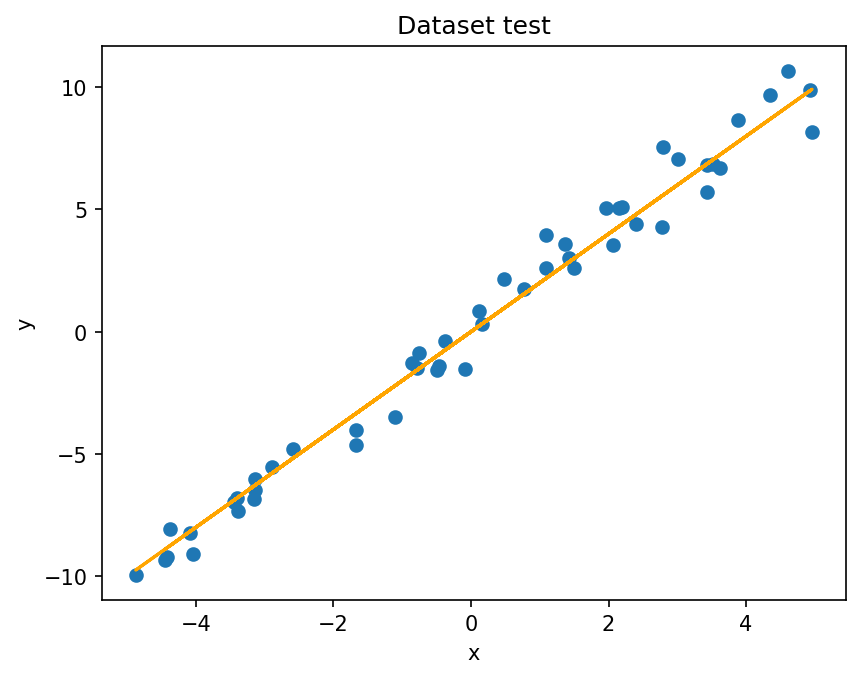

In [2]:
import matplotlib.pyplot as plt

# generate an N dataset with a uniform distribution from -5 to 5 
n = 50
x = np.random.uniform(-5, 5, n)
# generate the target values
y = 2*x + np.random.normal(0, 1, n)

plt.figure(dpi=150)
# test with scatter plot
plt.scatter(x, y)
# plot the line
plt.plot(x, 2*x, color='orange')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Dataset test')
plt.show()


**ANSWER:**

The data appear to be correct. The scatter plot of the points and the line $y=2x$ are consistent with the model $Y = 2x + E$, where $E$ has a normal distribution with mean 0 and a standard deviation of 1. The points are distributed around the line $y=2x$ and this is the best possible fit here.

---

**(d)** Split the data above into two *disjoint* subsets, each with half of the data (25 data points each).  Lets call these $d_{TR}$ and $d_{TE}$.  Feed $d_{TR}$ into your single_variable_lls "fit" method. Then use your "predict" method to make predictions for the points in both the $d_{TE}$ and $d_{TR}$ datasets.  Please report the mean square error (MSE) on both the training and testing datasets, respectively.  For full credit, please clearly label these values in your answer below.



In [3]:
from sklearn.model_selection import train_test_split

# split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=406)

# create an LLS object
lls = single_variable_lls()

# fit the model
lls.fit(x_train, y_train)
# predict the target values
y_hat = lls.predict(x_test)

MSE = error(y_test, y_hat)
print('MSE on TRAINING SET:', MSE)

lls.fit(x_test, y_test)
# predict the target values
y_hat = lls.predict(x_train)

MSE = error(y_train, y_hat)
print('MSE on TEST SET:', MSE)

MSE on TRAINING SET: 0.8653846461606638
MSE on TEST SET: 0.6709466387048403


---

**(e)** Please make a figure with two axes on it: (i) in the first axes please scatter plot the training data, the true underlying function (i.e., $y = 2x$), and the line created by using your LLS weights; (ii) on the second axes scatter plot the testing data, the true underlying function, and the line created by your LLS model.  For full credit, please make sure you include titles, legend, and labels for the axes on all of your plots. Please use these plots to determine that your implementation of LLS is working properly.



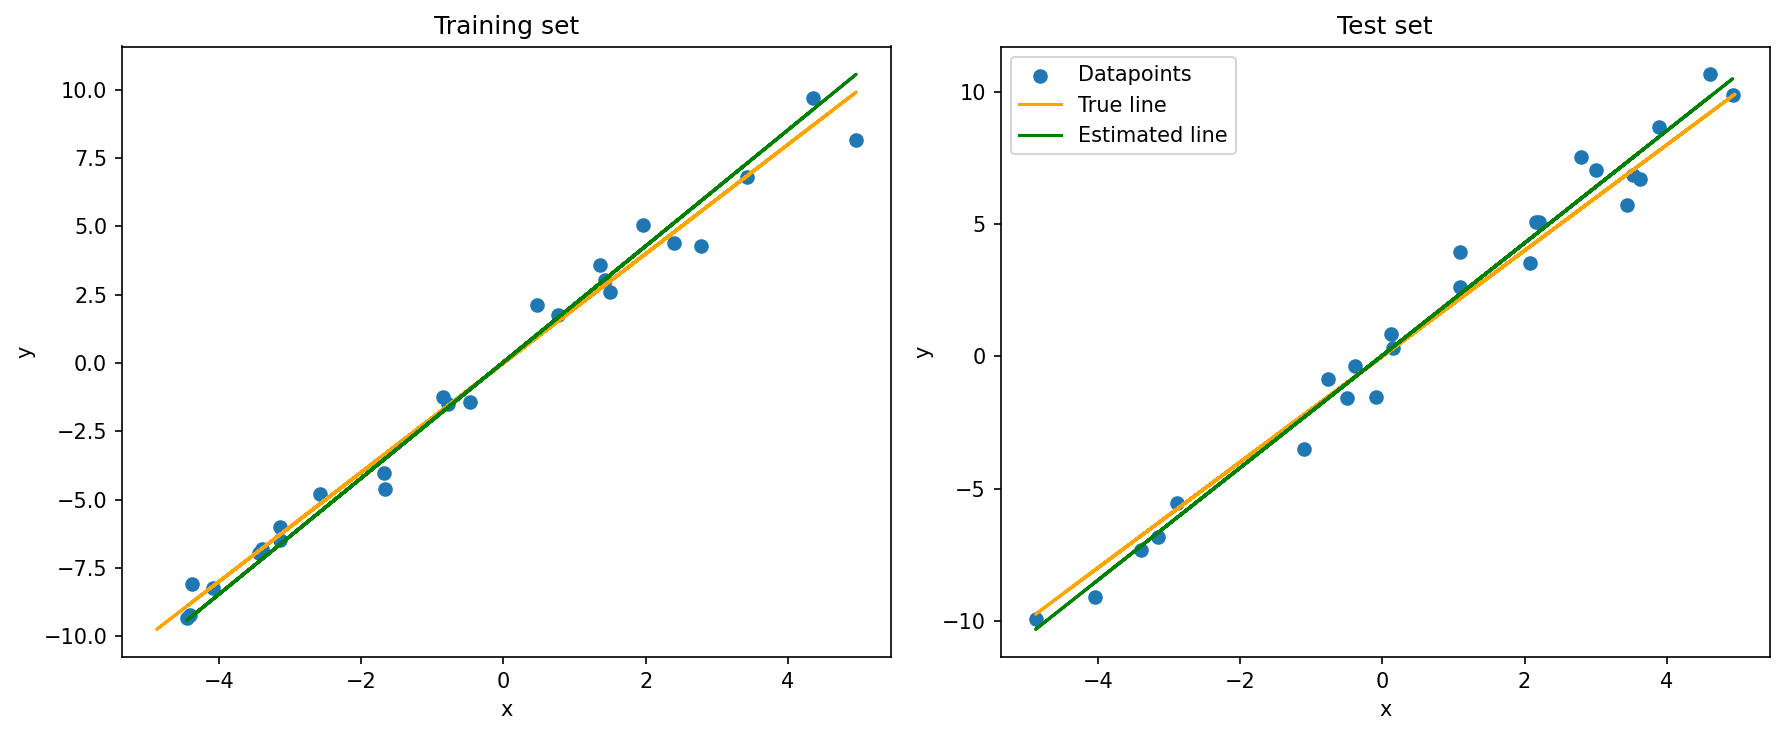

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5), dpi=150)
# scatter training set and line on the first plot
axs[0].scatter(x_train, y_train)
axs[0].plot(x, 2*x, color='orange')
axs[0].plot(x_train, lls.predict(x_train), color='green')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].set_title('Training set')

# scatter test set and line on the second plot
axs[1].scatter(x_test, y_test)
axs[1].plot(x, 2*x, color='orange')
axs[1].plot(x_test, lls.predict(x_test), color='green')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].set_title('Test set')
plt.legend(['Datapoints', 'True line', 'Estimated line'])

plt.tight_layout()

---

**(f)** Please comment on the results you obtained in parts (d) and (e).  How do the MSE values obtained on the training and testing sets compare to one another?  If you ran this experiment again would you expect the same pattern, and why?


**ANSWER:**

The MSE values are comparable for both sets measured against each other, $MSE_{TR} = 0.97$ and $MSE_{TE} = 1.15$. Both values are to be expected, given that the synthetic error is normally distributed with a mean of 0 and a standard deviation of 1. 

If I were to run this experiment again, I would expect similar results-- however I would expect a decent amount of variation just due to the fact that the size of both datasets is tiny, and so the random disjoint test/train split will introduce some variance each time.

---

## 3 Constructing a Shallow Neural Network
**[20 points] Build your own llinear regression algorithm**.

In this problem you will construct a shallow neural network (i.e., one hidden layer) like Fig. 3.4(b) of our "Understanding Deep Learning" textbook.  Your goal is to create a neural network that can produce the single-variable function given by the figure below.  Specifically, your challenge is to choose the number of hidden neurons, and the weight and bias settings of the network to produce the desired output shown in the figure. I have provided the code for a relu function below.  I strongly recommend you read Ch. 3 before attempting to solve this problem.

**(a)** Fill in the code skeleton below called "my_nn" with an implementation of a shallow network that produces the function in the figure.

**(b)** Demonstrate that your shallow network produces the desired output by plotting the output of your "my_nn" over 50 uniformly sampled x-values within the range $x\in[0,1]$. Please place a grid on the plot so that it is easy to verify that your code reproduces the desired function closely.

Text(0, 0.5, 'y')

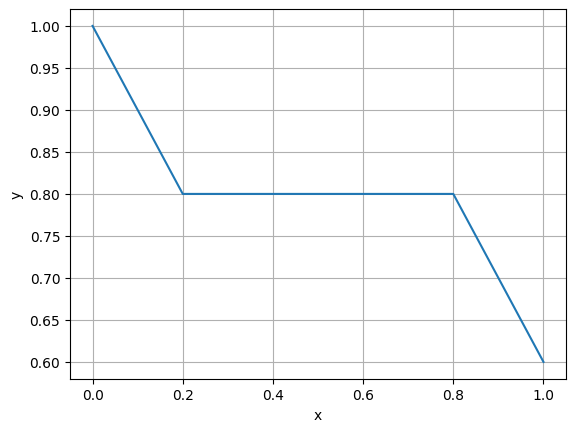

In [1]:
# TARGET FUNCTION
import matplotlib.pyplot as plt, numpy as np

x = [0,0.2,0.8,1]
y = [1,0.8,0.8,0.6]
plt.plot(x,y)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')

**ANSWER:**

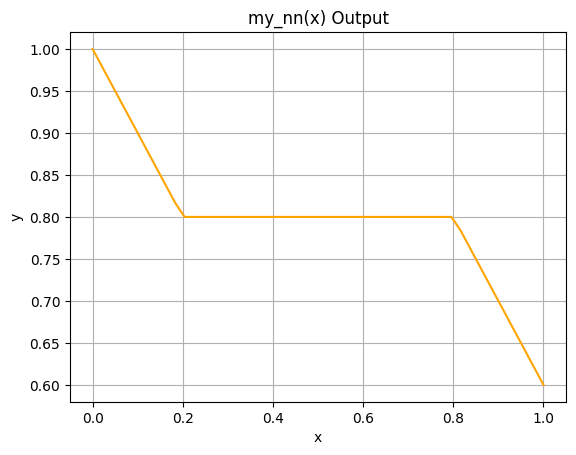

<Figure size 960x720 with 0 Axes>

In [50]:
def relu(x):
	return max(0.0, x)

def my_nn(x):
  # Hidden layer
  # Neuron 1 activates for x < 0.2
  h1 = relu(x - 0)
  # Neuron 2 activates for x > 0.2
  h2 = relu(x - 0.2)
  # Neuron 3 activates for x > 0.8
  h3 = relu(x - 0.8)
  # Output layer, starts at y = 1 and slope decreases with h1 and h3, and increases to 0 with h2
  o = 1.0 - 1*h1 + 1*h2 - 1*h3
  return o

x = np.linspace(0, 1, 50)
plt.plot(x, [my_nn(x) for x in x], color='orange')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('my_nn(x) Output')
plt.figure(dpi=150)
plt.show()